<a href="https://colab.research.google.com/github/amyrafynaz/amyrafynaz.github.io/blob/master/Project_Electricity_Renewables_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Excel file to check its sheets and data
file_path = 'Electricity_Renewables_Energy_Data.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names

['Renewables Consumption - EJ',
 'Renewable Power - EJ',
 'Renewable Power TWh',
 'Renewables Generation by Source',
 'Solar_Wind_Consumption(EJ)_Data',
 'Solar_Wind_Generation(TWh)_Data',
 'Solar_Wind_Installed_Capacity_D',
 'Solar Technology Types',
 'Wind Technology Types ',
 'Electricity Generation - TWh',
 'Elec generation by fuel',
 'Electric generation']

In [2]:
# Initialize an empty dictionary to store summary details for each sheet
summary = {}

# Loop through each sheet and summarize the data
for sheet_name in excel_data.sheet_names:
    # Load the sheet into a DataFrame
    sheet_df = excel_data.parse(sheet_name)

    # Collect summary details
    summary[sheet_name] = {
        "Number of Rows": sheet_df.shape[0],
        "Number of Columns": sheet_df.shape[1],
        "Column Names": list(sheet_df.columns),
        "Data Types": sheet_df.dtypes.to_dict(),
        "Missing Values": sheet_df.isnull().sum().to_dict()
    }

# Create a DataFrame to display the summaries in a structured format
summary_df = pd.DataFrame.from_dict(summary, orient="index")
summary_df


,Number of Rows,Number of Columns,Column Names,Data Types,Missing Values
Renewables Consumption - EJ,4838,3,"[Country, Year, Renewables Energy(EJ)]","{'Country': object, 'Year': int64, 'Renewables...","{'Country': 0, 'Year': 0, 'Renewables Energy(E..."
Renewable Power - EJ,5310,4,"[Country, Year, Renewable Power(Inc Hydro EJ),...","{'Country': object, 'Year': int64, 'Renewable ...","{'Country': 0, 'Year': 0, 'Renewable Power(Inc..."
Renewable Power TWh,5428,4,"[Country, Year, Renewable Power(Inc Hydro TWh)...","{'Country': object, 'Year': int64, 'Renewable ...","{'Country': 0, 'Year': 0, 'Renewable Power(Inc..."
Renewables Generation by Source,182,7,"[Country, Year, Wind, Solar, Hydro, Others Ren...","{'Country': object, 'Year': int64, 'Wind': flo...","{'Country': 0, 'Year': 0, 'Wind': 0, 'Solar': ..."
Solar_Wind_Consumption(EJ)_Data,5428,4,"[Country, Year, Solar Consumption(EJ), Wind Co...","{'Country': object, 'Year': int64, 'Solar Cons...","{'Country': 0, 'Year': 0, 'Solar Consumption(E..."
Solar_Wind_Generation(TWh)_Data,5428,4,"[Country, Year, Solar Generation(TWh), Wind Ge...","{'Country': object, 'Year': int64, 'Solar Gene...","{'Country': 0, 'Year': 0, 'Solar Generation(TW..."
Solar_Wind_Installed_Capacity_D,1056,4,"[Country, Year, Solar Installed Capacity, Wind...","{'Country': object, 'Year': int64, 'Solar Inst...","{'Country': 0, 'Year': 0, 'Solar Installed Cap..."
Solar Technology Types,118,5,"[Country, Year, Solar PV, CSP, Total]","{'Country': object, 'Year': int64, 'Solar PV':...","{'Country': 0, 'Year': 0, 'Solar PV': 0, 'CSP'..."
Wind Technology Types,102,5,"[Country, Year, Onshore, Offshore, Total]","{'Country': object, 'Year': int64, 'Onshore': ...","{'Country': 0, 'Year': 0, 'Onshore': 0, 'Offsh..."
Electricity Generation - TWh,3549,3,"[Country, Year, Electricity Generation(TWh)]","{'Country': object, 'Year': int64, 'Electricit...","{'Country': 0, 'Year': 0, 'Electricity Generat..."


# Data Overview

In [3]:
# Correcting the sheet names and loading the data samples
sheets_to_inspect = [
    'Renewables Consumption - EJ',
    'Renewable Power TWh',
    'Solar_Wind_Consumption(EJ)_Data',
    'Solar_Wind_Generation(TWh)_Data',
    'Electricity Generation - TWh'
]

# Load the first few rows from the corrected key sheets
sheet_samples = {sheet: excel_data.parse(sheet).head() for sheet in sheets_to_inspect}
sheet_samples



{'Renewables Consumption - EJ':      Country  Year  Renewables Energy(EJ)
 0     Canada  1965               1.257066
 1     Mexico  1965               0.094348
 2         US  1965               2.271066
 3  Argentina  1965               0.013042
 4     Brazil  1965               0.271611,
 'Renewable Power TWh':      Country  Year  Renewable Power(Inc Hydro TWh)  \
 0     Canada  1965                      118.088000   
 1     Mexico  1965                        8.863000   
 2         US  1965                      212.306318   
 3  Argentina  1965                        1.225116   
 4     Brazil  1965                       25.515000   
 
    Renewable Power(Excl Hydro TWh)  
 0                         0.000000  
 1                         0.000000  
 2                        13.332232  
 3                         0.000000  
 4                         0.000000  ,
 'Solar_Wind_Consumption(EJ)_Data':      Country  Year  Solar Consumption(EJ)  Wind Consumption(EJ)
 0     Canada  1965       

In [4]:
# Load all relevant sheets into individual dataframes
dataframes = {
    sheet: excel_data.parse(sheet) for sheet in [
        'Renewables Consumption - EJ',
        'Renewable Power TWh',
        'Solar_Wind_Consumption(EJ)_Data',
        'Solar_Wind_Generation(TWh)_Data',
        'Electricity Generation - TWh'
    ]
}

# Create a new dictionary with standardized keys
standardized_dataframes = {}
for key, df in dataframes.items():
    # Standardize the key to match the column name format
    standardized_key = key.strip().lower().replace(" ", "_")

    # Update the NEW dictionary with the standardized key and DataFrame
    standardized_dataframes[standardized_key] = df

    # Standardize column names within the DataFrame
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    df.rename(columns={'year': 'year', 'country': 'country'}, inplace=True)

# Use the standardized_dataframes for merging
combined_data = standardized_dataframes['renewables_consumption_-_ej']
# Use standardized keys for merging
for key in ['renewable_power_twh', 'solar_wind_consumption(ej)_data', 'solar_wind_generation(twh)_data',
            'electricity_generation_-_twh']: # Changed 'electric generation ' to 'electric_generation'
    combined_data = pd.merge(combined_data, standardized_dataframes[key], on=['country', 'year'], how='outer')


# Display a sample of the combined dataset
# Display the corrected dataset keys to identify the issue
dataframes.keys()
combined_data

,country,year,renewables_energy(ej),renewable_power(inc_hydro_twh),renewable_power(excl_hydro_twh),solar_consumption(ej),wind_consumption(ej),solar_generation(twh),wind_generation(twh),electricity_generation(twh)
0,Algeria,1965,0.004258,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,Algeria,1966,0.003779,0.355000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,Algeria,1967,0.004365,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,Algeria,1968,0.005993,0.563000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,Algeria,1969,0.003843,0.361000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
5423,Western Africa,2019,NaN,23.816359,1.305937,0.007571,0.002203,0.797844,0.232136,80.429213
5424,Western Africa,2020,NaN,24.002856,1.559440,0.008094,0.003938,0.856130,0.416474,85.919029
5425,Western Africa,2021,NaN,26.049239,2.013054,0.010295,0.005731,1.092888,0.608331,91.131930
5426,Western Africa,2022,NaN,27.749949,2.148938,0.011567,0.005651,1.232382,0.602039,92.447039


In [5]:
# Save the merged dataset to a new Excel file
merged_output_path = 'Merged_Energy_Dataset_combined.xlsx'
combined_data.to_excel(merged_output_path, index=False)

merged_output_path


'Merged_Energy_Dataset_combined.xlsx'

In [6]:
# Load the newly uploaded file
file_path = 'Merged_Energy_Dataset_combined.xlsx'
merged_data = pd.read_excel(file_path)

# Ensure the year column is in integer format
merged_data['year'] = merged_data['year'].astype(int)

# Filter the dataset for the last two decades
start_year = merged_data['year'].max() - 40
filtered_data = merged_data[merged_data['year'] >= start_year]

# Display the filtered dataset to the user
filtered_data


,country,year,renewables_energy(ej),renewable_power(inc_hydro_twh),renewable_power(excl_hydro_twh),solar_consumption(ej),wind_consumption(ej),solar_generation(twh),wind_generation(twh),electricity_generation(twh)
18,Algeria,1983,0.002502,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
19,Algeria,1984,0.004812,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
20,Algeria,1985,0.006877,0.646000,0.000000,0.000000,0.000000,0.000000,0.000000,12.274000
21,Algeria,1986,0.002661,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,12.981000
22,Algeria,1987,0.005312,0.499000,0.000000,0.000000,0.000000,0.000000,0.000000,12.722000
...,...,...,...,...,...,...,...,...,...,...
5423,Western Africa,2019,NaN,23.816359,1.305937,0.007571,0.002203,0.797844,0.232136,80.429213
5424,Western Africa,2020,NaN,24.002856,1.559440,0.008094,0.003938,0.856130,0.416474,85.919029
5425,Western Africa,2021,NaN,26.049239,2.013054,0.010295,0.005731,1.092888,0.608331,91.131930
5426,Western Africa,2022,NaN,27.749949,2.148938,0.011567,0.005651,1.232382,0.602039,92.447039


In [7]:
# Save the merged dataset to a new Excel file
merged_output_path = 'Merged_Energy_Dataset_filtered.xlsx'
filtered_data.to_excel(merged_output_path, index=False)

merged_output_path


'Merged_Energy_Dataset_filtered.xlsx'

# Data Preprocessing

In [8]:
# Load the new uploaded dataset to analyze missing values
merged_data_path = 'Merged_Energy_Dataset_filtered.xlsx'
merged_data = pd.read_excel(merged_data_path)

# Analyze missing values in the dataset
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary DataFrame for missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_summary


,Missing Values,Percentage
renewables_energy(ej),410,11.55255
electricity_generation(twh),223,6.28346
year,0,0.00000
country,0,0.00000
renewable_power(excl_hydro_twh),0,0.00000
renewable_power(inc_hydro_twh),0,0.00000
solar_consumption(ej),0,0.00000
wind_consumption(ej),0,0.00000
solar_generation(twh),0,0.00000
wind_generation(twh),0,0.00000


In [9]:
# Display the main dataset to the user
display(merged_data)

,country,year,renewables_energy(ej),renewable_power(inc_hydro_twh),renewable_power(excl_hydro_twh),solar_consumption(ej),wind_consumption(ej),solar_generation(twh),wind_generation(twh),electricity_generation(twh)
0,Algeria,1983,0.002502,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,Algeria,1984,0.004812,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,Algeria,1985,0.006877,0.646000,0.000000,0.000000,0.000000,0.000000,0.000000,12.274000
3,Algeria,1986,0.002661,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,12.981000
4,Algeria,1987,0.005312,0.499000,0.000000,0.000000,0.000000,0.000000,0.000000,12.722000
...,...,...,...,...,...,...,...,...,...,...
3767,Western Africa,2019,NaN,23.816359,1.305937,0.007571,0.002203,0.797844,0.232136,80.429213
3768,Western Africa,2020,NaN,24.002856,1.559440,0.008094,0.003938,0.856130,0.416474,85.919029
3769,Western Africa,2021,NaN,26.049239,2.013054,0.010295,0.005731,1.092888,0.608331,91.131930
3770,Western Africa,2022,NaN,27.749949,2.148938,0.011567,0.005651,1.232382,0.602039,92.447039


In [10]:
# Calculate the total number of data points
total_data_points = merged_data.shape[0] * merged_data.shape[1]

# Display the total number of data points
print(f"Total data points in the dataset: {total_data_points}")


Total data points in the dataset: 37720


In [11]:
# Apply interpolation to handle missing values in 'renewables_energy(ej)' and 'electricity_generation(twh)'
df_interpolated = merged_data.copy()
df_interpolated['renewables_energy(ej)'] = df_interpolated['renewables_energy(ej)'].interpolate(method='linear')
df_interpolated['electricity_generation(twh)'] = df_interpolated['electricity_generation(twh)'].interpolate(method='linear')

# Check if there are still missing values
remaining_missing = df_interpolated.isnull().sum()

remaining_missing



,0
country,0
year,0
renewables_energy(ej),0
renewable_power(inc_hydro_twh),0
renewable_power(excl_hydro_twh),0
solar_consumption(ej),0
wind_consumption(ej),0
solar_generation(twh),0
wind_generation(twh),0
electricity_generation(twh),2


In [12]:
merged_data.copy()

,country,year,renewables_energy(ej),renewable_power(inc_hydro_twh),renewable_power(excl_hydro_twh),solar_consumption(ej),wind_consumption(ej),solar_generation(twh),wind_generation(twh),electricity_generation(twh)
0,Algeria,1983,0.002502,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,Algeria,1984,0.004812,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,Algeria,1985,0.006877,0.646000,0.000000,0.000000,0.000000,0.000000,0.000000,12.274000
3,Algeria,1986,0.002661,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,12.981000
4,Algeria,1987,0.005312,0.499000,0.000000,0.000000,0.000000,0.000000,0.000000,12.722000
...,...,...,...,...,...,...,...,...,...,...
3767,Western Africa,2019,NaN,23.816359,1.305937,0.007571,0.002203,0.797844,0.232136,80.429213
3768,Western Africa,2020,NaN,24.002856,1.559440,0.008094,0.003938,0.856130,0.416474,85.919029
3769,Western Africa,2021,NaN,26.049239,2.013054,0.010295,0.005731,1.092888,0.608331,91.131930
3770,Western Africa,2022,NaN,27.749949,2.148938,0.011567,0.005651,1.232382,0.602039,92.447039


In [13]:
df_interpolated['electricity_generation(twh)'] = df_interpolated['electricity_generation(twh)'].fillna(
    df_interpolated['electricity_generation(twh)'].mean()
)

# Verify that there are no missing values left
final_missing_values = df_interpolated.isnull().sum()

final_missing_values

,0
country,0
year,0
renewables_energy(ej),0
renewable_power(inc_hydro_twh),0
renewable_power(excl_hydro_twh),0
solar_consumption(ej),0
wind_consumption(ej),0
solar_generation(twh),0
wind_generation(twh),0
electricity_generation(twh),0


In [14]:
# Apply mean imputation for the remaining missing values in 'electricity_generation(twh)'
df_interpolated['electricity_generation(twh)'].fillna(
    df_interpolated['electricity_generation(twh)'].mean(), inplace=True
)

# Verify that there are no missing values left
final_missing_values = df_interpolated.isnull().sum()

final_missing_values


<ipython-input-14-14008aeec432>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_interpolated['electricity_generation(twh)'].fillna(


,0
country,0
year,0
renewables_energy(ej),0
renewable_power(inc_hydro_twh),0
renewable_power(excl_hydro_twh),0
solar_consumption(ej),0
wind_consumption(ej),0
solar_generation(twh),0
wind_generation(twh),0
electricity_generation(twh),0


In [15]:
# Save the merged dataset to a new Excel file
merged_output_path = 'Merged_Energy_Dataset_final.xlsx'
df_interpolated.to_excel(merged_output_path, index=False)

merged_output_path


'Merged_Energy_Dataset_final.xlsx'

# Exploratory Data Analysis

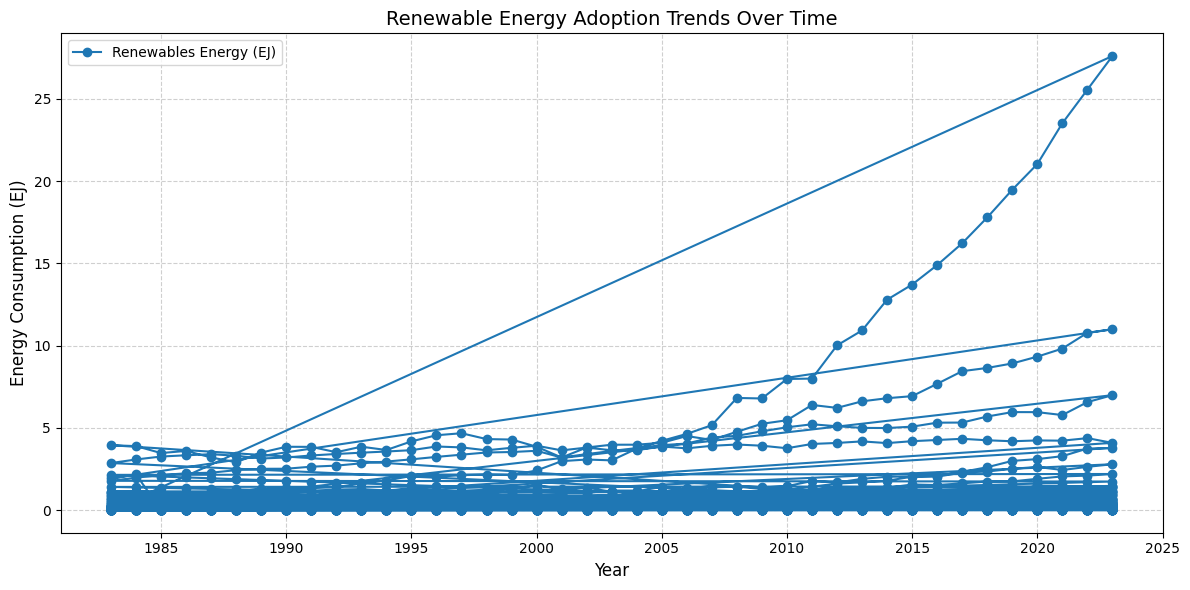

In [ ]:
import matplotlib.pyplot as plt

# Plot renewable energy metrics over time
plt.figure(figsize=(12, 6))

# Plot for renewables energy consumption (ej)
if 'year' in df_interpolated.columns and 'renewables_energy(ej)' in df_interpolated.columns:
    plt.plot(
        df_interpolated['year'],
        df_interpolated['renewables_energy(ej)'],
        label='Renewables Energy (EJ)',
        marker='o'
    )

# Labels and Title
plt.title('Renewable Energy Adoption Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Consumption (EJ)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


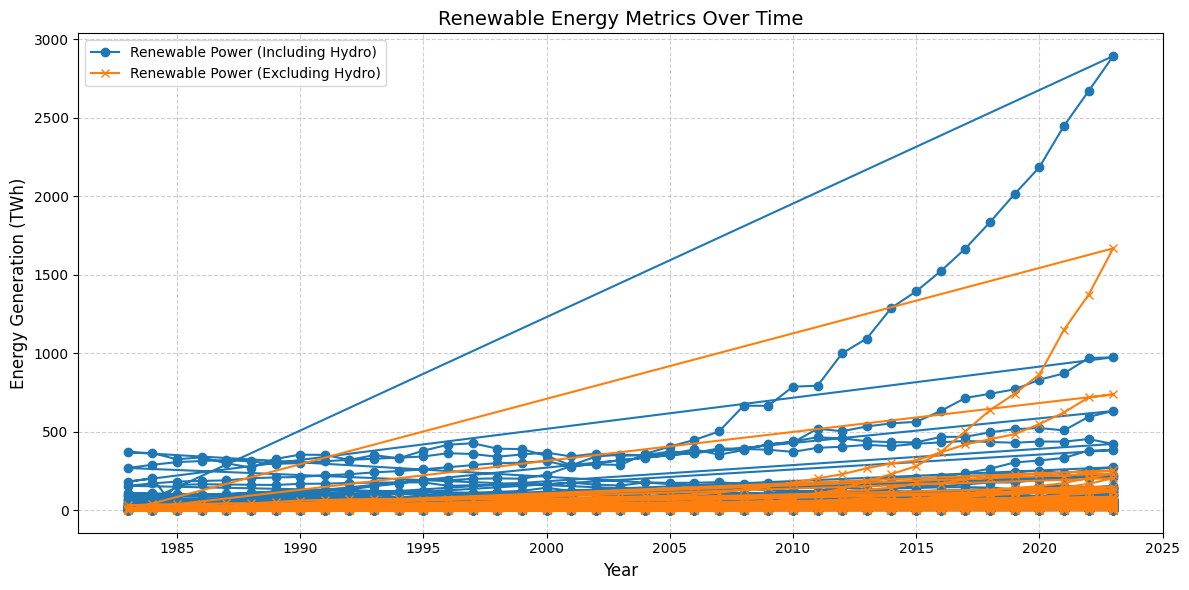

In [ ]:
# Line chart to visualize renewable energy adoption trends over time
plt.figure(figsize=(12, 6))

# Plot for renewable energy metrics (inc. and excl. hydro)
if 'year' in df_interpolated.columns:
    if 'renewable_power(inc_hydro_twh)' in df_interpolated.columns:
        plt.plot(
            df_interpolated['year'],
            df_interpolated['renewable_power(inc_hydro_twh)'],
            label='Renewable Power (Including Hydro)',
            marker='o'
        )
    if 'renewable_power(excl_hydro_twh)' in df_interpolated.columns:
        plt.plot(
            df_interpolated['year'],
            df_interpolated['renewable_power(excl_hydro_twh)'],
            label='Renewable Power (Excluding Hydro)',
            marker='x'
        )

# Add labels, legend, and grid
plt.title('Renewable Energy Metrics Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Energy Generation (TWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the line chart
plt.show()


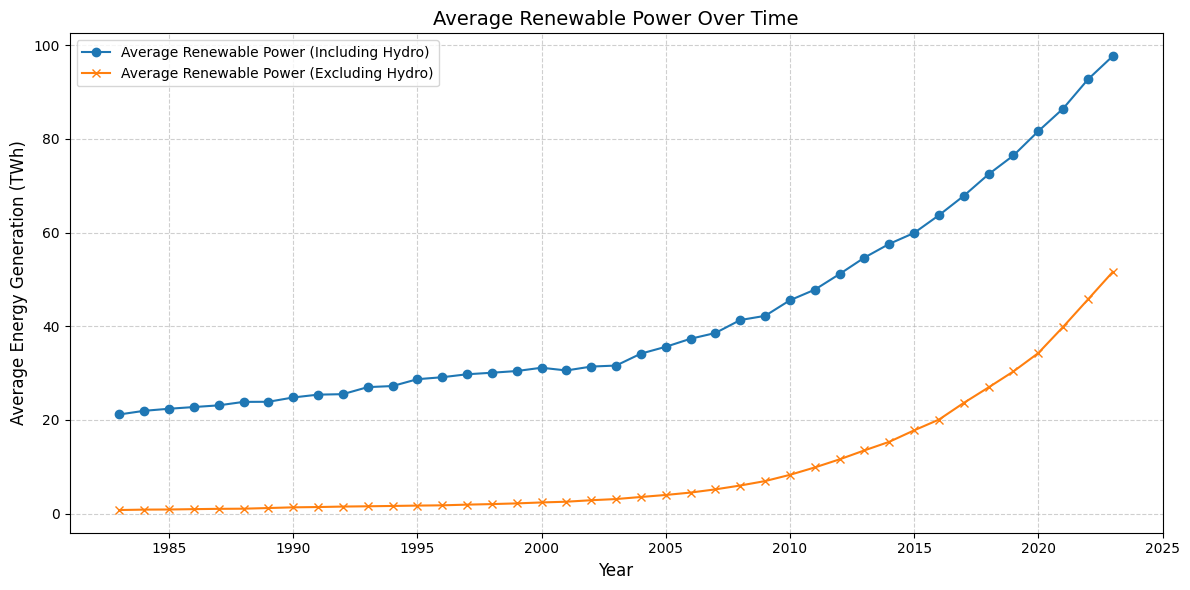

In [ ]:
# Calculate average renewable power metrics over time
avg_renewable_inc_hydro = df_interpolated.groupby('year')['renewable_power(inc_hydro_twh)'].mean()
avg_renewable_excl_hydro = df_interpolated.groupby('year')['renewable_power(excl_hydro_twh)'].mean()

# Plot the average renewable power metrics
plt.figure(figsize=(12, 6))
plt.plot(
    avg_renewable_inc_hydro.index, avg_renewable_inc_hydro.values,
    label='Average Renewable Power (Including Hydro)', marker='o'
)
plt.plot(
    avg_renewable_excl_hydro.index, avg_renewable_excl_hydro.values,
    label='Average Renewable Power (Excluding Hydro)', marker='x'
)

# Add labels, legend, and grid
plt.title('Average Renewable Power Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Energy Generation (TWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Display the line chart
plt.show()


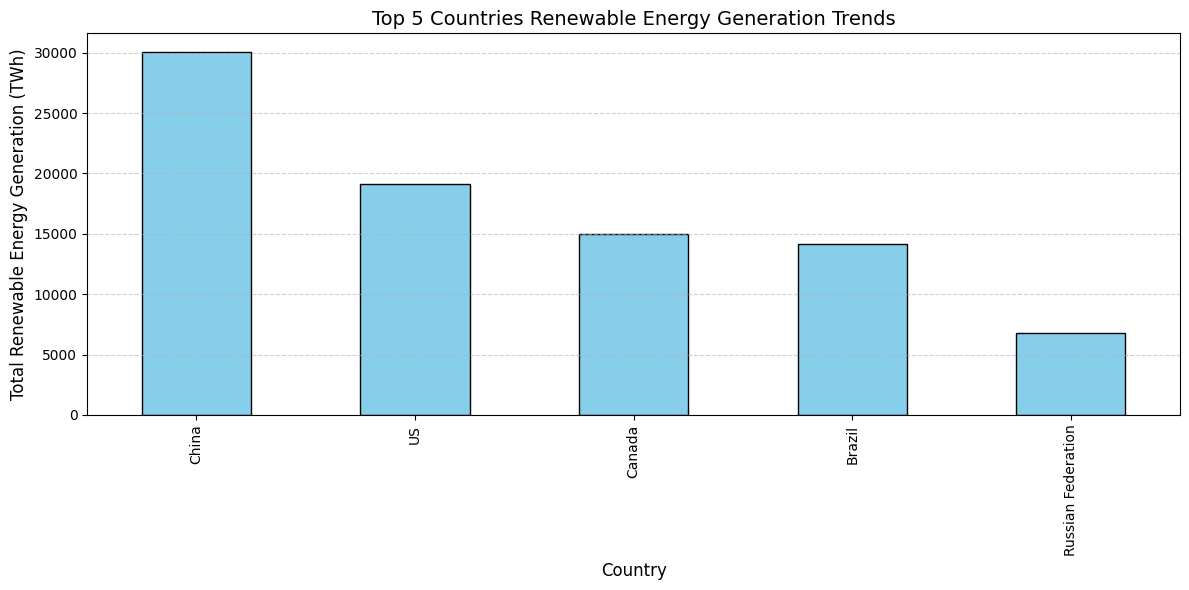

<ipython-input-79-4fd6a1159cdc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


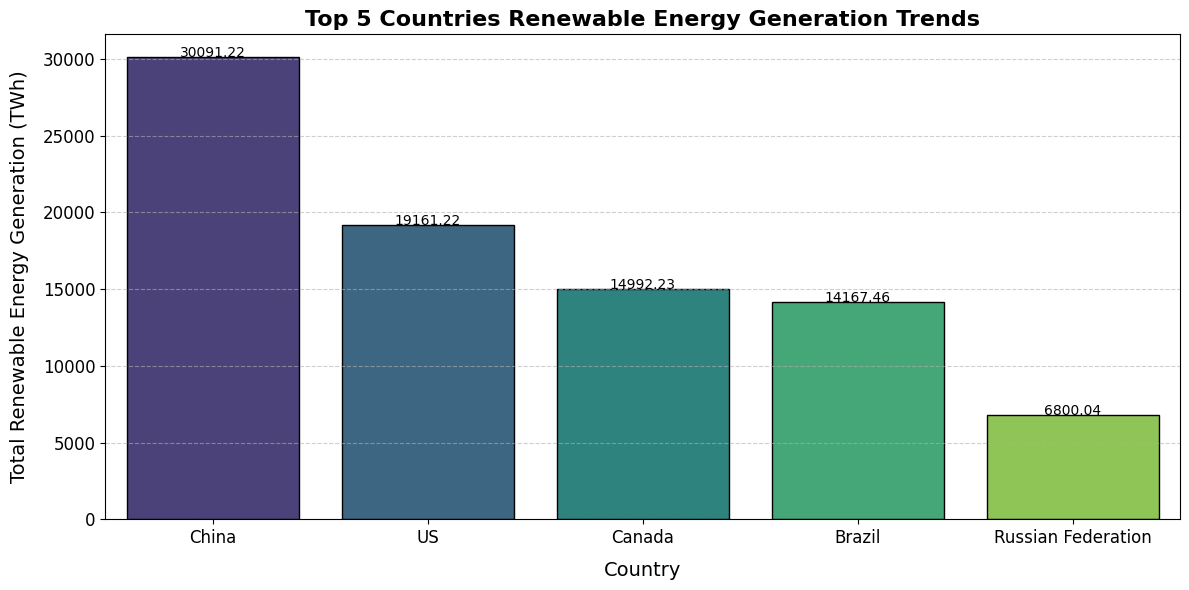

In [ ]:
import seaborn as sns

# Check if 'country' and renewable energy columns exist for analysis
if 'country' in df_interpolated.columns and 'renewable_power(inc_hydro_twh)' in df_interpolated.columns:
    # Aggregate total renewable power (including hydro) by country
    country_generation = df_interpolated.groupby('country')['renewable_power(inc_hydro_twh)'].sum()

    # Sort countries by total generation and select the top 5
    top_5_countries = country_generation.sort_values(ascending=False).head(5)

    # Plot the top 5 countries renewable energy generation trends
    plt.figure(figsize=(12, 6))
    top_5_countries.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add labels, title, and grid
    plt.title('Top 5 Countries Renewable Energy Generation Trends', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Display the bar chart
    plt.show()
else:
    print("The dataset does not contain the necessary columns for country-wise renewable energy analysis.")

# Enhanced bar chart for top 5 countries' renewable energy generation trends
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_5_countries.index,
    y=top_5_countries.values,
    palette='viridis',
    edgecolor='black'
)

# Add data labels
for index, value in enumerate(top_5_countries.values):
    plt.text(index, value + 5, f'{value:.2f}', ha='center', fontsize=10, color='black')

# Customize plot aesthetics
plt.title('Top 5 Countries Renewable Energy Generation Trends', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14, labelpad=10)
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the improved bar chart
plt.show()


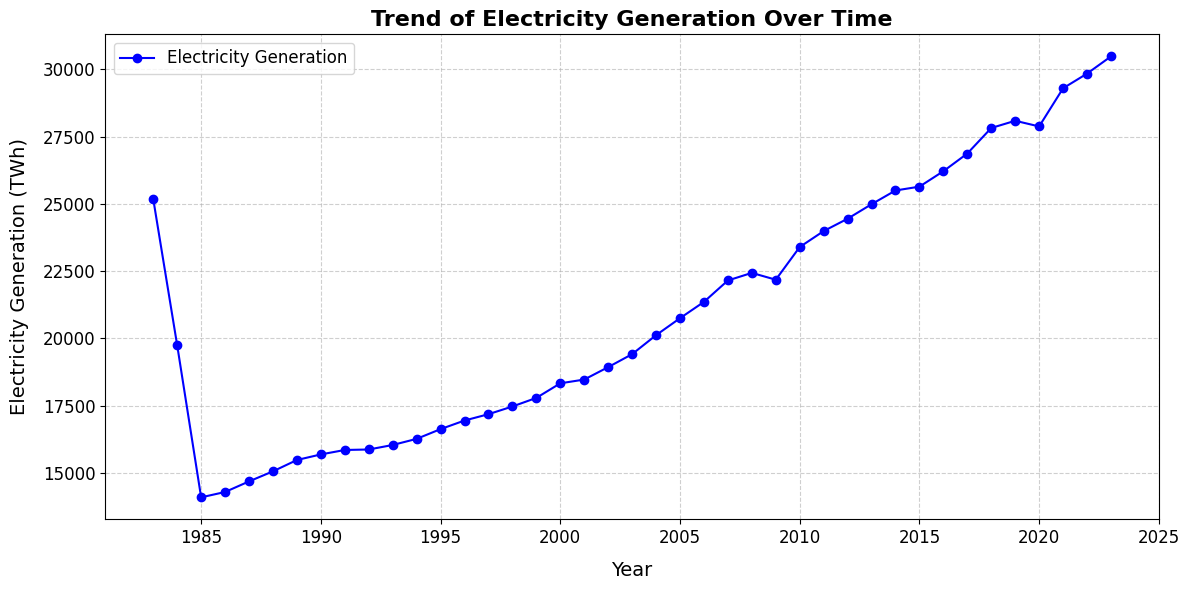

In [ ]:


# Check if the required columns exist
if 'year' in df_interpolated.columns and 'electricity_generation(twh)' in df_interpolated.columns:
    # Aggregate electricity generation over time
    electricity_trend = df_interpolated.groupby('year')['electricity_generation(twh)'].sum()

    # Plot the trend of electricity generation over time
    plt.figure(figsize=(12, 6))
    plt.plot(
        electricity_trend.index, electricity_trend.values,
        marker='o', linestyle='-', color='blue', label='Electricity Generation'
    )

    # Add labels, title, and grid
    plt.title('Trend of Electricity Generation Over Time', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=14, labelpad=10)
    plt.ylabel('Electricity Generation (TWh)', fontsize=14, labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Display the line chart
    plt.show()
else:
    print("The dataset does not contain the required columns for electricity generation trend analysis.")


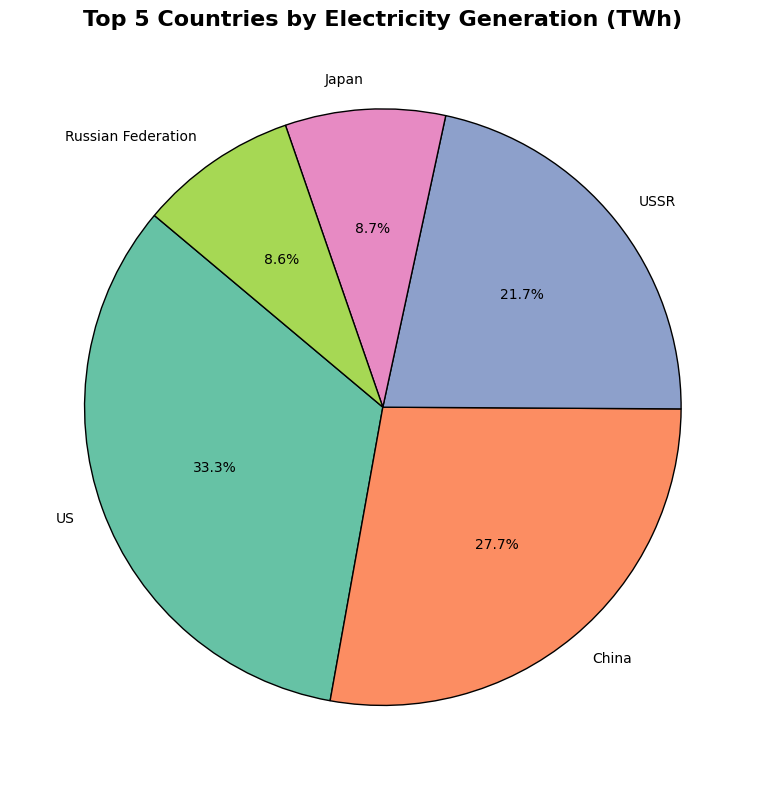

In [ ]:
# Check if 'country' and 'electricity_generation(twh)' columns exist for analysis
if 'country' in df_interpolated.columns and 'electricity_generation(twh)' in df_interpolated.columns:
    # Aggregate total electricity generation by country
    country_electricity = df_interpolated.groupby('country')['electricity_generation(twh)'].sum()

    # Sort countries by total electricity generation and select the top 5
    top_5_countries_electricity = country_electricity.sort_values(ascending=False).head(5)

    # Plot a pie chart for the top 5 countries' electricity generation
    plt.figure(figsize=(10, 8))
    top_5_countries_electricity.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2', 5),
        wedgeprops={'edgecolor': 'black'}
    )

    # Add title and make the chart visually appealing
    plt.title('Top 5 Countries by Electricity Generation (TWh)', fontsize=16, weight='bold')
    plt.ylabel('')  # Remove the default ylabel
    plt.tight_layout()

    # Display the pie chart
    plt.show()
else:
    print("The dataset does not contain the necessary columns for country-wise electricity generation analysis.")


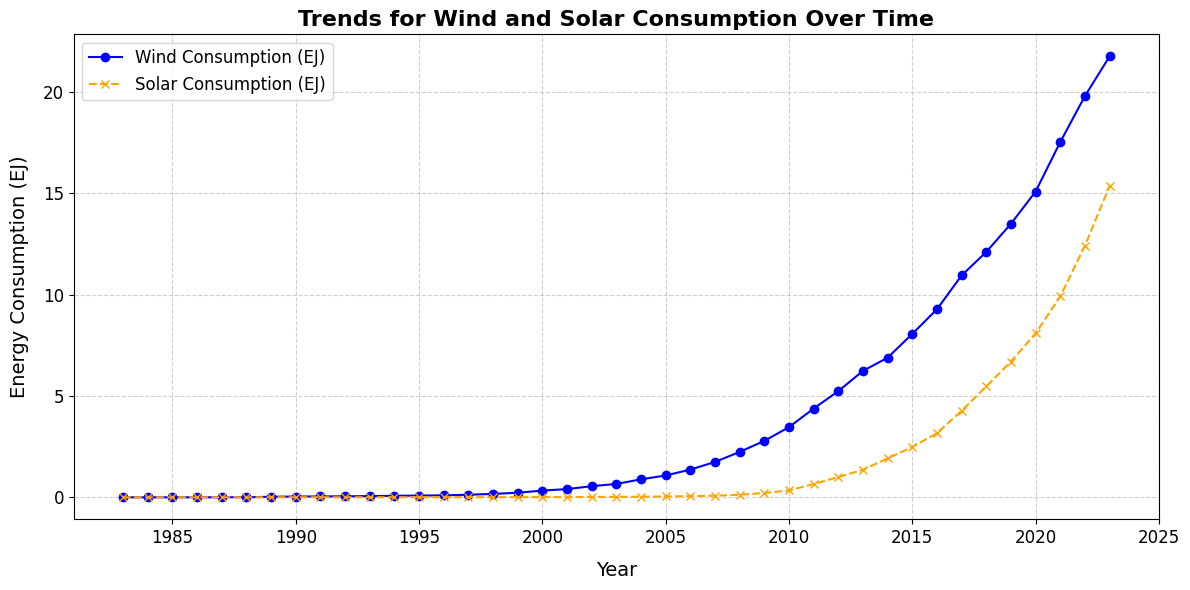

In [ ]:
# Check if the required columns exist for analysis
if 'year' in df_interpolated.columns and 'wind_consumption(ej)' in df_interpolated.columns and 'solar_consumption(ej)' in df_interpolated.columns:
    # Aggregate wind and solar consumption over time
    wind_trend = df_interpolated.groupby('year')['wind_consumption(ej)'].sum()
    solar_trend = df_interpolated.groupby('year')['solar_consumption(ej)'].sum()

    # Plot the trends for wind and solar consumption
    plt.figure(figsize=(12, 6))
    plt.plot(wind_trend.index, wind_trend.values, marker='o', label='Wind Consumption (EJ)', color='blue', linestyle='-')
    plt.plot(solar_trend.index, solar_trend.values, marker='x', label='Solar Consumption (EJ)', color='orange', linestyle='--')

    # Add labels, title, and grid
    plt.title('Trends for Wind and Solar Consumption Over Time', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=14, labelpad=10)
    plt.ylabel('Energy Consumption (EJ)', fontsize=14, labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Display the line chart
    plt.show()
else:
    print("The dataset does not contain the required columns for wind and solar consumption trends.")


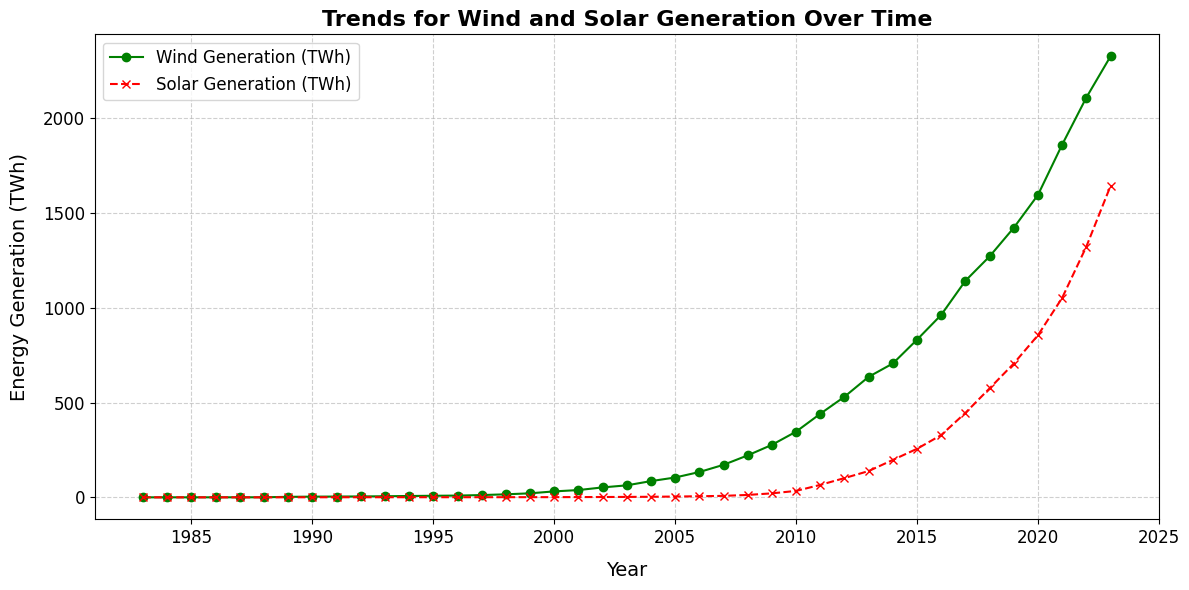

In [ ]:
# Check if the required columns exist for analysis
if 'year' in df_interpolated.columns and 'wind_generation(twh)' in df_interpolated.columns and 'solar_generation(twh)' in df_interpolated.columns:
    # Aggregate wind and solar generation over time
    wind_generation_trend = df_interpolated.groupby('year')['wind_generation(twh)'].sum()
    solar_generation_trend = df_interpolated.groupby('year')['solar_generation(twh)'].sum()

    # Plot the trends for wind and solar generation
    plt.figure(figsize=(12, 6))
    plt.plot(wind_generation_trend.index, wind_generation_trend.values, marker='o', label='Wind Generation (TWh)', color='green', linestyle='-')
    plt.plot(solar_generation_trend.index, solar_generation_trend.values, marker='x', label='Solar Generation (TWh)', color='red', linestyle='--')

    # Add labels, title, and grid
    plt.title('Trends for Wind and Solar Generation Over Time', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=14, labelpad=10)
    plt.ylabel('Energy Generation (TWh)', fontsize=14, labelpad=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Display the line chart
    plt.show()
else:
    print("The dataset does not contain the required columns for wind and solar generation trends.")


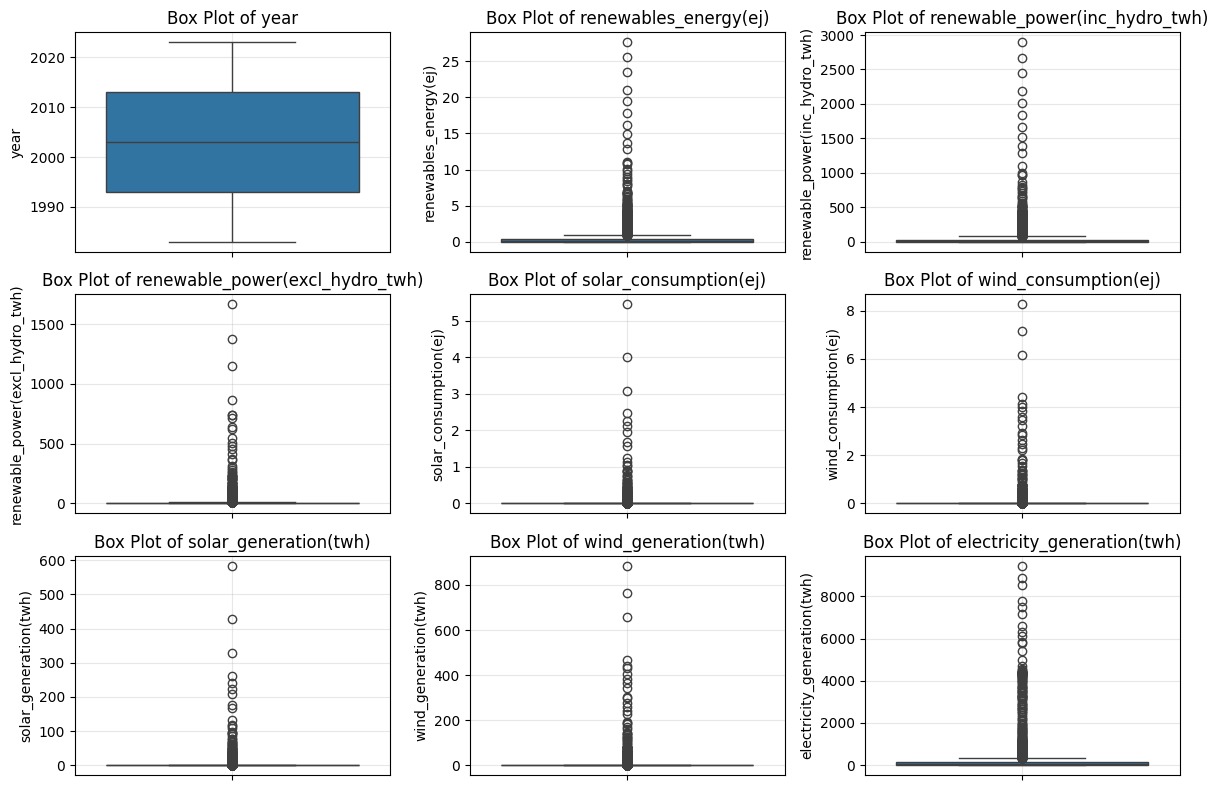

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns in the dataset
numerical_columns = df_interpolated.select_dtypes(include=['float64', 'int64']).columns

# Adjust the subplot grid layout to accommodate all numerical columns
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(data=df_interpolated[column].apply(pd.to_numeric, errors='coerce'))
    plt.title(f'Box Plot of {column}')
    plt.grid(alpha=0.3)
    plt.tight_layout()

plt.show()



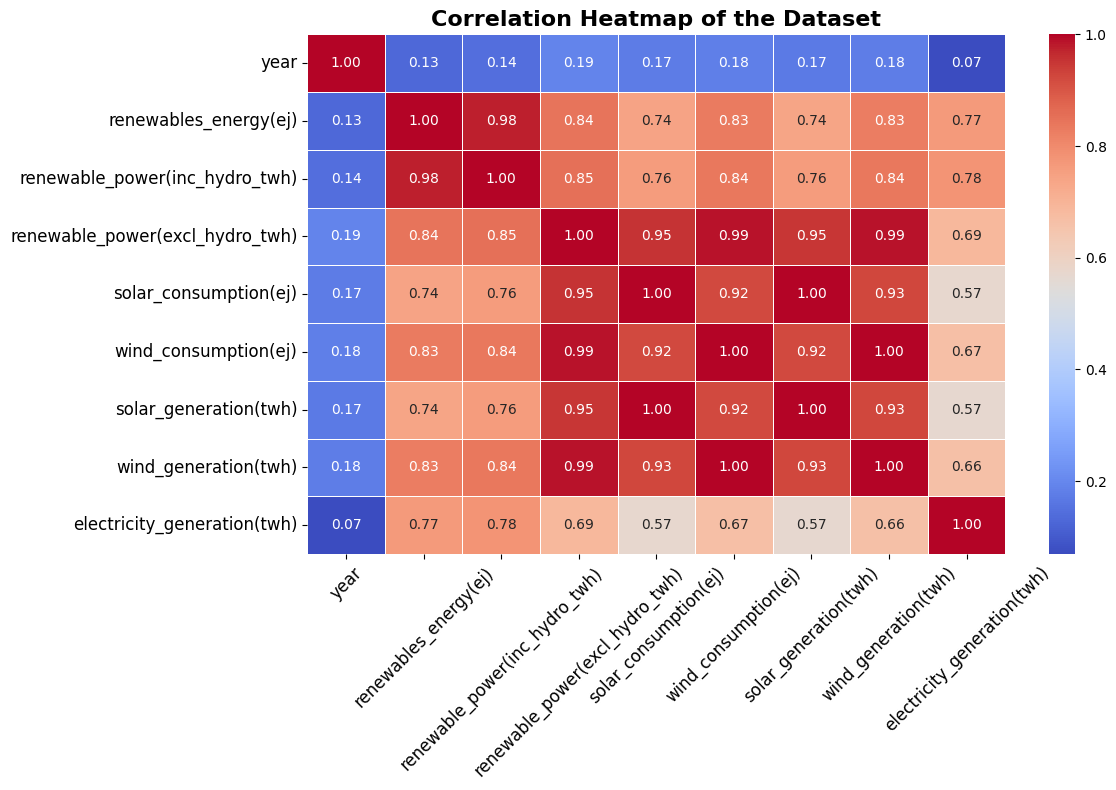

In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df_interpolated[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar=True
)

# Add title and labels
plt.title('Correlation Heatmap of the Dataset', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()


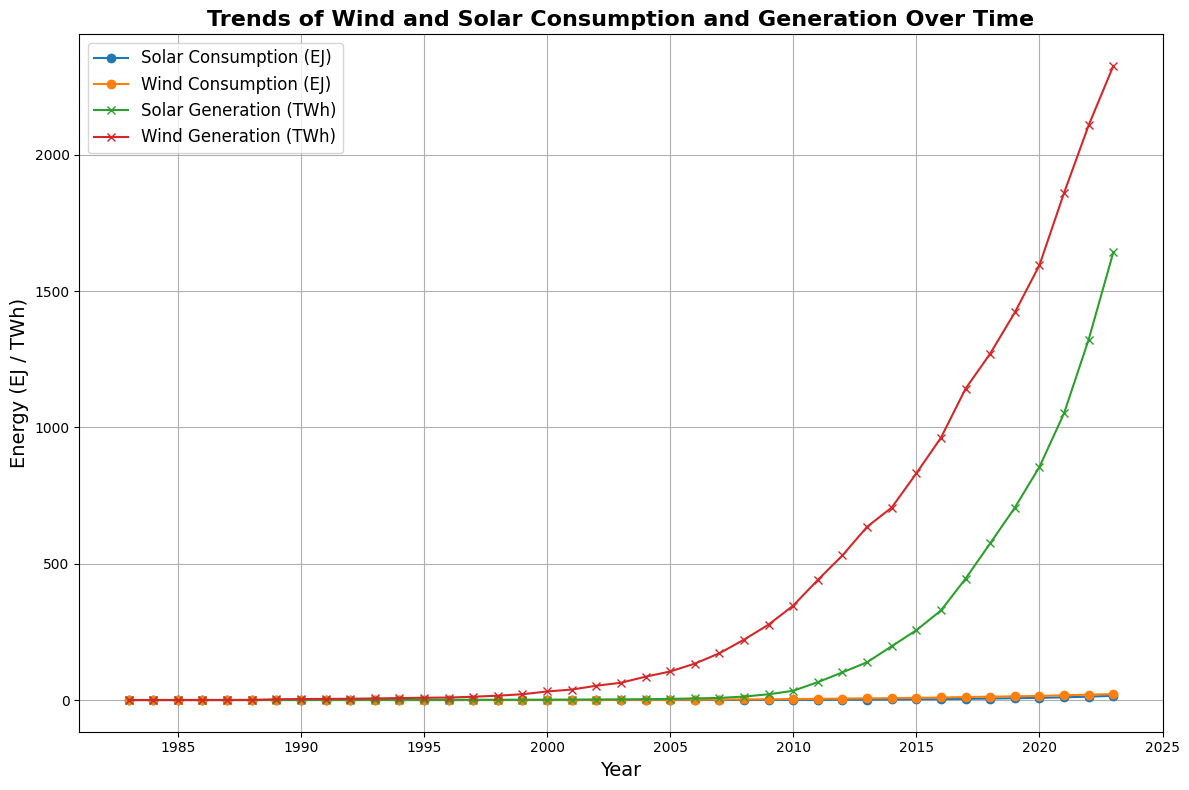

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns of interest
columns_of_interest = ['year', 'solar_consumption(ej)', 'wind_consumption(ej)', 'solar_generation(twh)', 'wind_generation(twh)']

# Now you can use the variable to select the desired columns
df_trend = df_interpolated[columns_of_interest]

# Group by year and calculate the sum for each year (if applicable)
trend_data = df_trend.groupby('year').sum().reset_index()

# Plot the trends over time
plt.figure(figsize=(12, 8))
plt.plot(trend_data['year'], trend_data['solar_consumption(ej)'], label='Solar Consumption (EJ)', marker='o')
plt.plot(trend_data['year'], trend_data['wind_consumption(ej)'], label='Wind Consumption (EJ)', marker='o')
plt.plot(trend_data['year'], trend_data['solar_generation(twh)'], label='Solar Generation (TWh)', marker='x')
plt.plot(trend_data['year'], trend_data['wind_generation(twh)'], label='Wind Generation (TWh)', marker='x')

# Add labels, title, and legend
plt.title('Trends of Wind and Solar Consumption and Generation Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy (EJ / TWh)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


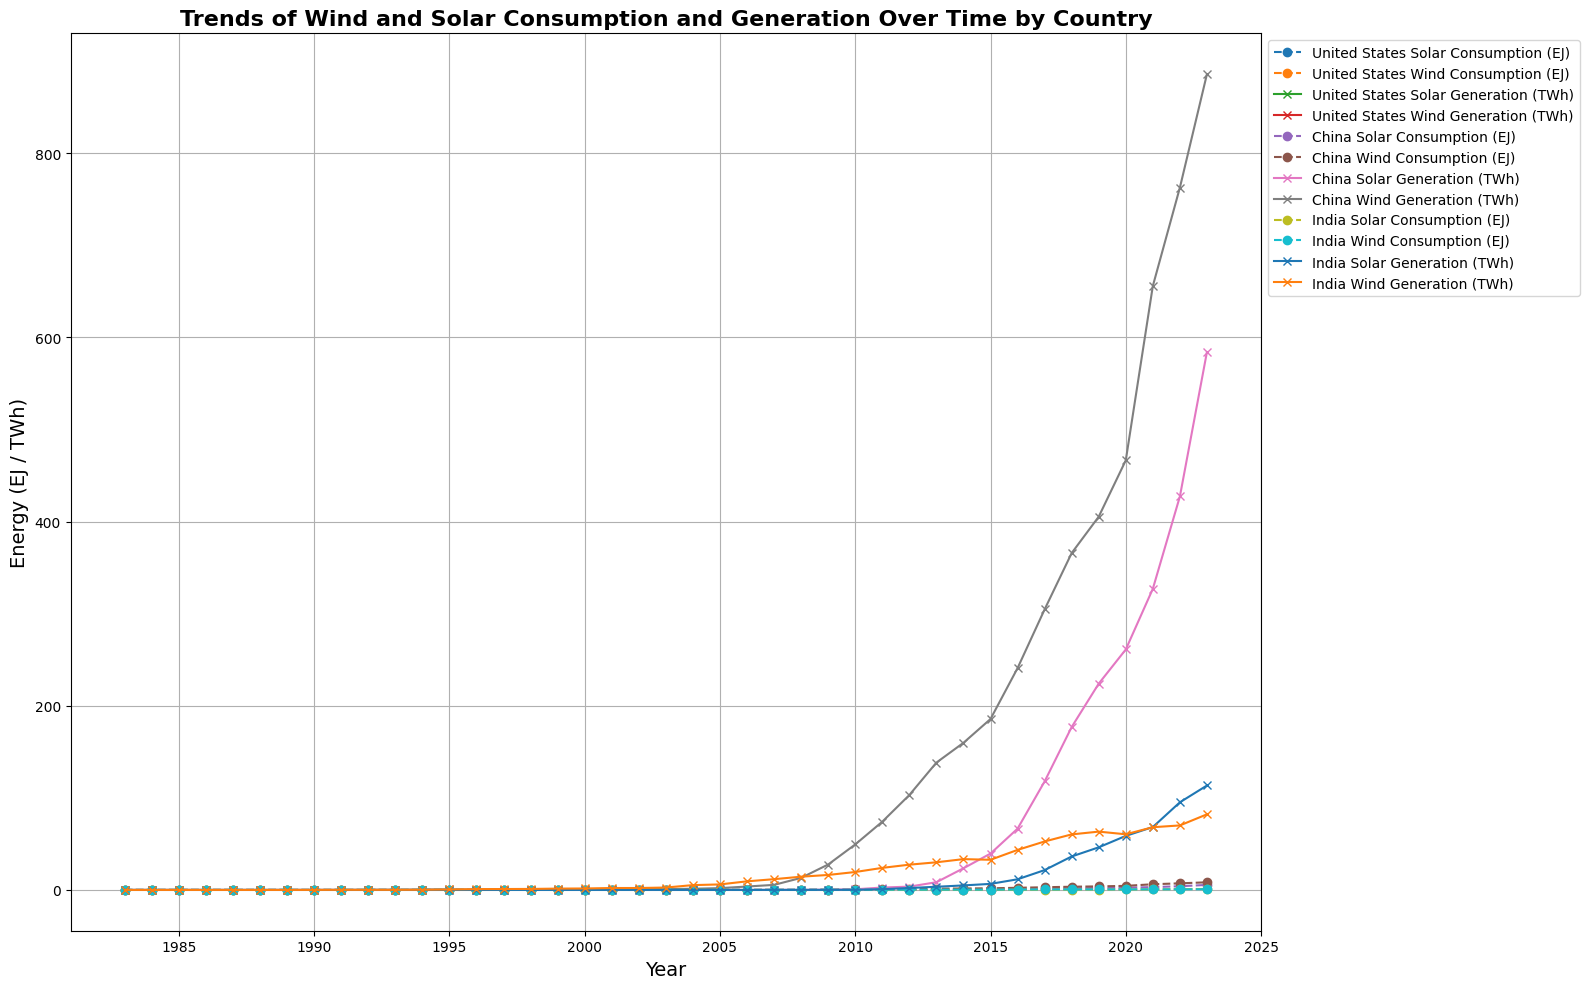

In [ ]:
# Group the data by country and year, then sum the values for each combination
country_trend_data = df_interpolated.groupby(['country', 'year']).sum().reset_index()

# Filter the data for a few specific countries (for example, USA, China, India) to make trends clearer
countries_of_interest = ['United States', 'China', 'India']
filtered_country_trends = country_trend_data[country_trend_data['country'].isin(countries_of_interest)]

# Plot the trends for each country
plt.figure(figsize=(16, 10))
for country in countries_of_interest:
    country_data = filtered_country_trends[filtered_country_trends['country'] == country]
    plt.plot(country_data['year'], country_data['solar_consumption(ej)'], label=f'{country} Solar Consumption (EJ)', linestyle='--', marker='o')
    plt.plot(country_data['year'], country_data['wind_consumption(ej)'], label=f'{country} Wind Consumption (EJ)', linestyle='--', marker='o')
    plt.plot(country_data['year'], country_data['solar_generation(twh)'], label=f'{country} Solar Generation (TWh)', linestyle='-', marker='x')
    plt.plot(country_data['year'], country_data['wind_generation(twh)'], label=f'{country} Wind Generation (TWh)', linestyle='-', marker='x')

# Add labels, legend, and title
plt.title('Trends of Wind and Solar Consumption and Generation Over Time by Country', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Energy (EJ / TWh)', fontsize=14)
plt.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# Feature Engineering

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Prepare features for LSTM and SARIMA
df_interpolated = df_interpolated.copy()

# 1. Temporal Features
df_interpolated['year_trend'] = df_interpolated['year'] - df_interpolated['year'].min()
df_interpolated['time_since_start'] = df_interpolated['year'] - df_interpolated['year'].min()  # Number of years since start

# 2. Lag Features (for LSTM and SARIMA)
df_interpolated['lag_1'] = df_interpolated['renewables_energy(ej)'].shift(1)
df_interpolated['lag_2'] = df_interpolated['renewables_energy(ej)'].shift(2)

# 3. Cumulative Features (for LSTM)
df_interpolated['cumulative_renewables_energy'] = df_interpolated['renewables_energy(ej)'].cumsum()
df_interpolated['cumulative_generation'] = df_interpolated['electricity_generation(twh)'].cumsum()

# 4. Growth Rate Features (for LSTM)
df_interpolated['renewable_power_growth'] = df_interpolated['renewable_power(inc_hydro_twh)'].pct_change()
df_interpolated['solar_generation_growth'] = df_interpolated['solar_generation(twh)'].pct_change()
df_interpolated['wind_generation_growth'] = df_interpolated['wind_generation(twh)'].pct_change()

# 5. Normalize the features (MinMax scaling for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_interpolated[['renewables_energy(ej)', 'renewable_power(inc_hydro_twh)',
                                                       'solar_consumption(ej)', 'wind_consumption(ej)',
                                                       'solar_generation(twh)', 'wind_generation(twh)',
                                                       'electricity_generation(twh)']])

# Adding the normalized columns back to the dataframe
scaled_df = pd.DataFrame(scaled_features, columns=['renewables_energy(ej)', 'renewable_power(inc_hydro_twh)',
                                                    'solar_consumption(ej)', 'wind_consumption(ej)',
                                                    'solar_generation(twh)', 'wind_generation(twh)',
                                                    'electricity_generation(twh)'])
df_interpolated[scaled_df.columns] = scaled_df

# Drop NA values created due to lag and growth calculation
df_interpolated = df_interpolated.dropna()

# Display the updated dataset with new features
df_interpolated


,country,year,renewables_energy(ej),renewable_power(inc_hydro_twh),renewable_power(excl_hydro_twh),solar_consumption(ej),wind_consumption(ej),solar_generation(twh),wind_generation(twh),electricity_generation(twh),year_trend,time_since_start,lag_1,lag_2,cumulative_renewables_energy,cumulative_generation,renewable_power_growth,solar_generation_growth,wind_generation_growth
31,Algeria,2014,0.000090,0.000088,0.061000,0.000107,0.000001,0.000103,0.000001,0.006793,31,31,0.001252,0.004104,0.084871,1334.461530,0.990596,1.097902,inf
32,Algeria,2015,0.000078,0.000077,0.077000,0.000103,0.000022,0.000099,0.000021,0.007275,32,32,0.002477,0.001252,0.087024,1403.259530,-0.125984,-0.033333,18.000000
33,Algeria,2016,0.000117,0.000116,0.264052,0.000432,0.000022,0.000419,0.000022,0.007508,33,33,0.002152,0.002477,0.090262,1474.256530,0.513748,3.224138,0.002740
34,Algeria,2017,0.000201,0.000200,0.523000,0.000884,0.000022,0.000863,0.000021,0.008039,34,34,0.003239,0.002152,0.095810,1550.273530,0.722947,1.057143,-0.002732
35,Algeria,2018,0.000252,0.000252,0.613000,0.001051,0.000011,0.001032,0.000011,0.008107,35,35,0.005547,0.003239,0.102762,1626.936530,0.260794,0.196429,-0.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,Western Africa,2019,0.040328,0.008229,1.305937,0.001386,0.000266,0.001366,0.000262,0.008505,36,36,1.113037,1.113037,1771.871214,862528.462339,0.133812,0.267777,0.208245
3768,Western Africa,2020,0.040328,0.008294,1.559440,0.001482,0.000475,0.001466,0.000470,0.009086,37,37,1.113037,1.113037,1772.984251,862614.381368,0.007831,0.073054,0.794095
3769,Western Africa,2021,0.040328,0.009001,2.013054,0.001885,0.000692,0.001871,0.000687,0.009637,38,38,1.113037,1.113037,1774.097288,862705.513298,0.085256,0.276544,0.460672
3770,Western Africa,2022,0.040328,0.009588,2.148938,0.002117,0.000682,0.002110,0.000680,0.009776,39,39,1.113037,1.113037,1775.210325,862797.960337,0.065288,0.127639,-0.010343


#LSTM Model

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create lag features for the previous 3 years (lag_1, lag_2, lag_3)
df_interpolated['lag_1'] = df_interpolated['renewables_energy(ej)'].shift(1)
df_interpolated['lag_2'] = df_interpolated['renewables_energy(ej)'].shift(2)
df_interpolated['lag_3'] = df_interpolated['renewables_energy(ej)'].shift(3)

# Drop the rows with missing values created by lagging
df_lagged = df_interpolated.dropna()

# Features for LSTM: Lag features + Temporal features (year_trend, time_since_start)
X_lstm = df_lagged[['lag_1', 'lag_2', 'lag_3', 'year_trend', 'time_since_start']].values
y_lstm = df_lagged['renewables_energy(ej)'].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_lstm_scaled = scaler.fit_transform(X_lstm)

# Reshape data for LSTM input (3D format: samples, time steps, features)
X_lstm_reshaped = X_lstm_scaled.reshape(X_lstm_scaled.shape[0], 1, X_lstm_scaled.shape[1])

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X_lstm_reshaped) * 0.8)
X_train, X_test = X_lstm_reshaped[:train_size], X_lstm_reshaped[train_size:]
y_train, y_test = y_lstm[:train_size], y_lstm[train_size:]


# b) Building and Training the LSTM Model:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))  # Output layer with one node for prediction

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
lstm_predictions = lstm_model.predict(X_test)

# Display the model summary
lstm_model.summary()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 8.3363e-04
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9950e-04 - val_loss: 7.0651e-04
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - val_loss: 7.4677e-04
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9419e-04 - val_loss: 6.2725e-04
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5293e-04 - val_loss: 6.4396e-04
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2047e-04 - val_loss: 5.7720e-04
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 5.5076e-04
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 5.3036e-04
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,755 (131.86 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,504 (87.91 KB)

# 2. Prepare the Data for SARIMA (Statistical Time Series Model)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Apply differencing to make the data stationary
df_interpolated['diff_renewables_energy'] = df_interpolated['renewables_energy(ej)'].diff()

# Drop missing values created by differencing
df_interpolated = df_interpolated.dropna()


#b) Fitting the SARIMA Model:

In [22]:
# Fit the SARIMA model (using p=1, d=1, q=1, seasonal_order=(1, 1, 1, 12) for yearly seasonality)
sarima_model = SARIMAX(df_interpolated['renewables_energy(ej)'],
                       order=(1, 1, 1),  # Non-seasonal AR, I, MA
                       seasonal_order=(1, 1, 1, 12),  # Seasonal AR, I, MA, period=12 (annual seasonality)
                       enforce_stationarity=False, enforce_invertibility=False)

# Train the SARIMA model
sarima_result = sarima_model.fit()

# Make predictions
sarima_predictions = sarima_result.predict(start=len(df_interpolated), end=len(df_interpolated) + 10)

# Display the summary of the SARIMA model
sarima_result.summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:              renewables_energy(ej)   No. Observations:                 1744
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                3686.217
Date:                            Wed, 21 May 2025   AIC                          -7362.434
Time:                                    11:05:37   BIC                          -7335.192
Sample:                                         0   HQIC                         -7352.354
                                           - 1744                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8893      0.014     64.193      0.000       0.862       0.916
ma.L1         -0.9772      0.010    -96.809      0.000      -0.997      -0.957
ar.S.L12      -0.0658      0.015     -4.265      0.000      -0.096      -0.036
ma.S.L12      -0.9937      0.027    -37.254      0.000      -1.046      -0.941
sigma2         0.0007   1.89e-05     38.541      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):          34970889.19
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                           -21.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       700.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Model Evaluation and Visualization

After training both models, we should evaluate their performance:

LSTM: You can evaluate the model using RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).

SARIMA: Evaluate the model using its residuals or compare predicted vs. actual values.

You can also visualize the predicted vs. actual values for both models to assess their performance.

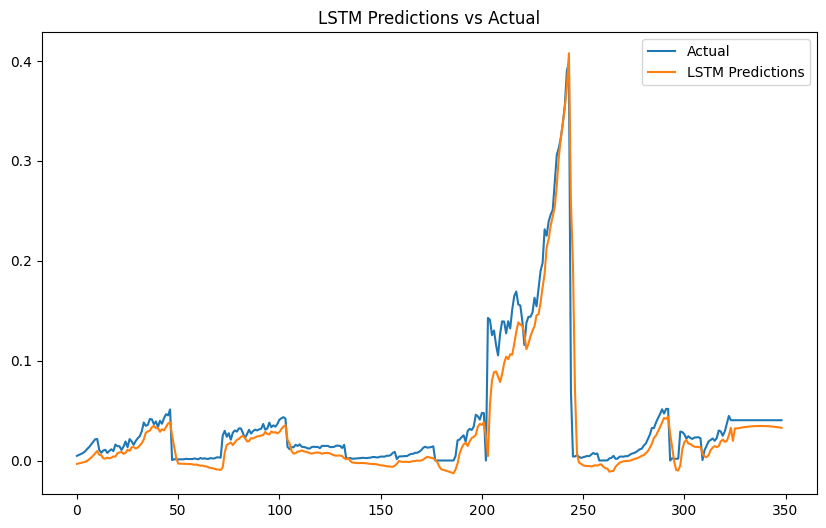

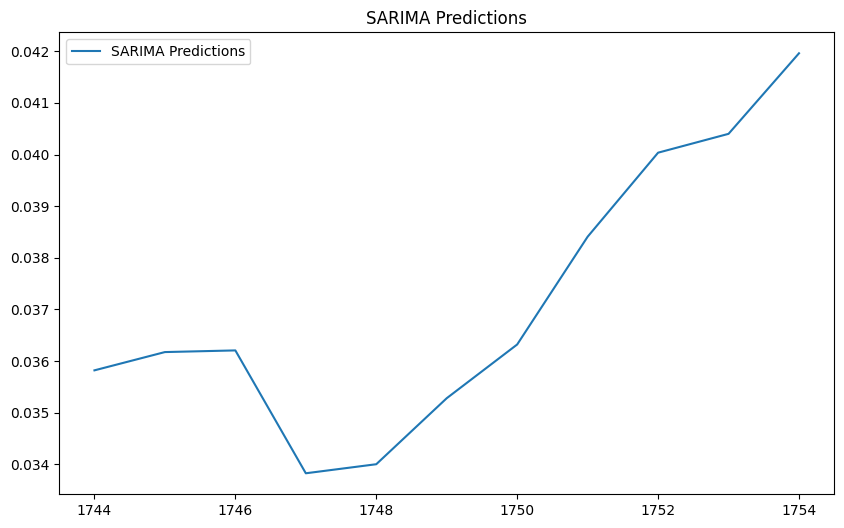

In [23]:
import matplotlib.pyplot as plt

# Plot LSTM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()

# Plot SARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('SARIMA Predictions')
plt.show()


# 1. Model Evaluation for LSTM

or LSTM, the common evaluation metrics for regression tasks are:

Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.

Root Mean Squared Error (RMSE): A widely used metric to evaluate the model's accuracy by measuring the average magnitude of error.

R-squared (R²): A statistical measure of how well the model explains the variance in the data.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate LSTM model performance
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2_lstm = r2_score(y_test, lstm_predictions)

# Print the evaluation metrics for LSTM
print(f"LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
print(f"R-squared (R²): {r2_lstm:.4f}")


LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.0121
Root Mean Squared Error (RMSE): 0.0216
R-squared (R²): 0.8888


# b) Hyperparameter Tuning for LSTM:

For LSTM, hyperparameter tuning typically involves adjusting the following:

Number of LSTM units (e.g., 50, 100, etc.)

Batch size (e.g., 32, 64)

Epochs (e.g., 20, 50)

Learning rate

A simple approach to hyperparameter tuning is to use Grid Search or Random Search over a range of hyperparameters. However, for LSTM models, it is common to manually experiment with values to optimize them. You can also use Keras Tuner or Optuna for automated hyperparameter tuning.

#2. Model Evaluation for SARIMA

For SARIMA, we can evaluate the model using the following metrics:

Mean Absolute Error (MAE): Similar to LSTM, it evaluates the average magnitude of errors in predictions.

Mean Squared Error (MSE): It penalizes large errors more than MAE.

Forecast Accuracy: We can compare the predicted values with actual future values (if available).

In [25]:
# Evaluate SARIMA model performance
mae_sarima = mean_absolute_error(df_interpolated['renewables_energy(ej)'], sarima_predictions)
rmse_sarima = np.sqrt(mean_squared_error(df_interpolated['renewables_energy(ej)'], sarima_predictions))

# Print the evaluation metrics for SARIMA
print(f"SARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_sarima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [1744, 11]

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming df_interpolated is your DataFrame and it has been preprocessed

# Split data into training and testing sets (80% train, 20% test)
# Make sure to keep the 'year' column for indexing the SARIMA predictions later
df_interpolated_indexed = df_interpolated.set_index('year')
train_size_sarima = int(len(df_interpolated_indexed) * 0.8)
train_data_sarima, test_data_sarima = df_interpolated_indexed[:train_size_sarima], df_interpolated_indexed[train_size_sarima:]

# Fit the SARIMA model on the training data
# Using the same order as before for consistency, adjust if needed based on analysis
sarima_model = SARIMAX(train_data_sarima['renewables_energy(ej)'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12), # Assuming yearly seasonality as before
                       enforce_stationarity=False, enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Make predictions on the test set
# The start and end indices should correspond to the test data in the original df_interpolated_indexed
start_index = len(train_data_sarima) # Start index of the test data
end_index = len(df_interpolated_indexed) - 1 # End index of the test data

# Predict using the forecast method for predictions on the test set
# forecast returns a Series or DataFrame with index corresponding to the predicted period
sarima_predictions = sarima_result.predict(start=start_index, end=end_index)


# Evaluate SARIMA model performance using the test data
mae_sarima = mean_absolute_error(test_data_sarima['renewables_energy(ej)'], sarima_predictions)
rmse_sarima = np.sqrt(mean_squared_error(test_data_sarima['renewables_energy(ej)'], sarima_predictions))

# Print the evaluation metrics for SARIMA
print(f"SARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_sarima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.4f}")

# You can still display the summary if you wish, though it's based on the training data
# sarima_result.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

SARIMA Model Evaluation:
Mean Absolute Error (MAE): 0.0406
Root Mean Squared Error (RMSE): 0.0765


# b) Hyperparameter Tuning for SARIMA:
For SARIMA, the main hyperparameters to tune are:

p, d, q: These are the non-seasonal autoregressive (AR), differencing (I), and moving average (MA) orders.

P, D, Q, S: These are the seasonal autoregressive, differencing, moving average, and period components.

Seasonal Period (S): If working with yearly data, this could be 12, or if quarterly, it could be 4.

Tuning these parameters can be done through:

Grid Search: Trying different combinations of p, d, q and P, D, Q, S.

AIC/BIC: Selecting the best model based on Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC), which penalizes overly complex models.

In [27]:
# Grid search approach for SARIMA parameters tuning (example)
# This part can be done manually or via automated methods

# You can also use the AIC or BIC to select the best combination of parameters:
sarima_result.aic  # Return the AIC of the model
sarima_result.bic  # Return the BIC of the model


np.float64(-5655.584955407335)

Alternatively, you can explore Auto-SARIMA for automatic hyperparameter tuning:

In [28]:
from pmdarima import auto_arima

# Automatically fit SARIMA model
auto_sarima_model = auto_arima(df_interpolated['renewables_energy(ej)'], seasonal=True, m=12, stepwise=True, trace=True)
auto_sarima_model.summary()


ModuleNotFoundError: No module named 'pmdarima'

In [29]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.6 MB/s eta 0:00:00


In [30]:
!pip install pmdarima
from pmdarima import auto_arima

# Automatically fit SARIMA model
auto_sarima_model = auto_arima(df_interpolated['renewables_energy(ej)'], seasonal=True, m=12, stepwise=True, trace=True)
auto_sarima_model.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# 3. Visualization of Evaluation Metrics

a) LSTM Model Evaluation Visualization:

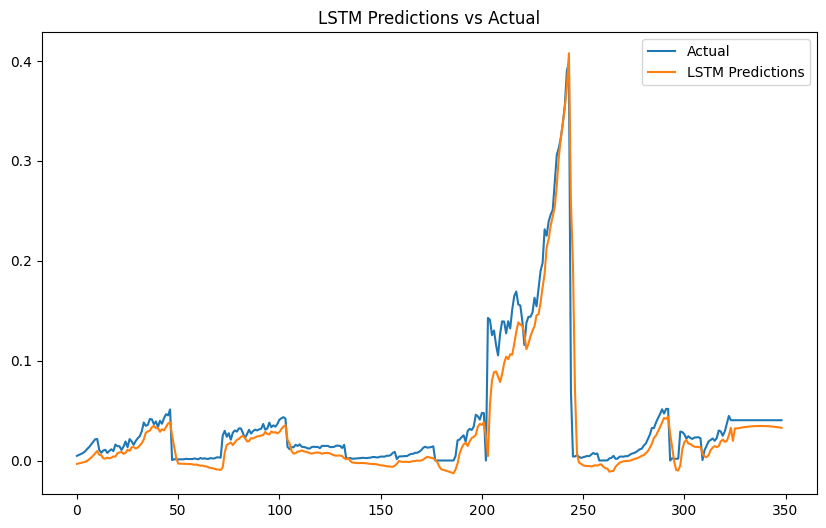

In [32]:
import matplotlib.pyplot as plt

# Plot LSTM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()


# b) SARIMA Model Evaluation Visualization:

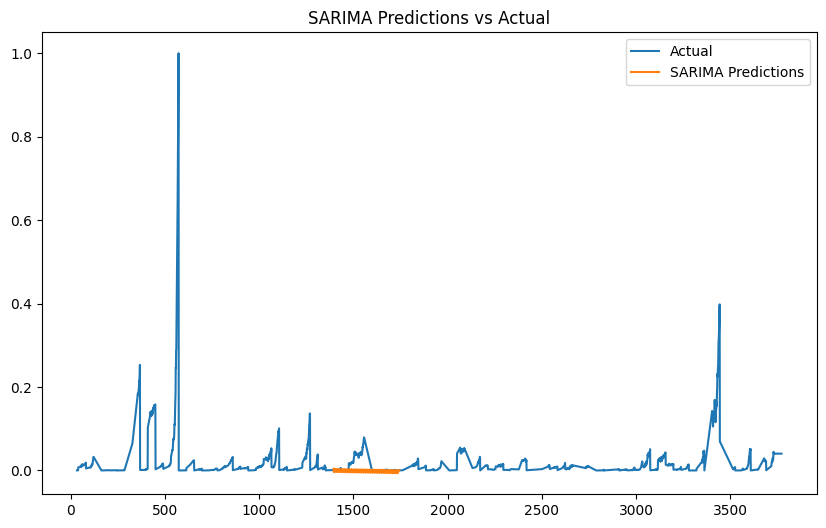

In [33]:
# Plot SARIMA predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated['renewables_energy(ej)'], label='Actual')
plt.plot(sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('SARIMA Predictions vs Actual')
plt.show()


# Step 1: Evaluate LSTM Model Performance

We will calculate MAE, RMSE, and R² for the LSTM model and visualize the predictions vs. actual values.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate LSTM model performance
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
r2_lstm = r2_score(y_test, lstm_predictions)

# Print the evaluation metrics for LSTM
print(f"LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
print(f"R-squared (R²): {r2_lstm:.4f}")


LSTM Model Evaluation:
Mean Absolute Error (MAE): 0.0121
Root Mean Squared Error (RMSE): 0.0216
R-squared (R²): 0.8888


# b) Visualize LSTM Predictions:
Plot the predicted vs actual values for the LSTM model to visually assess the model performance.

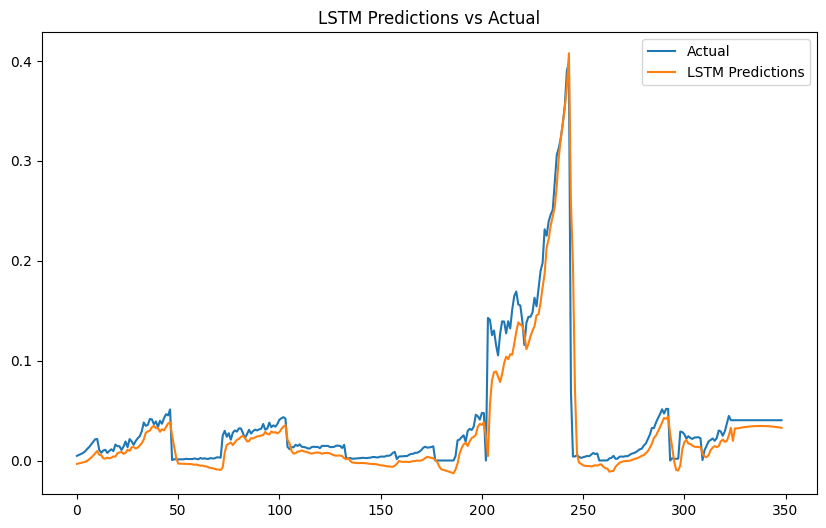

In [35]:
import matplotlib.pyplot as plt

# Plot LSTM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.legend()
plt.title('LSTM Predictions vs Actual')
plt.show()


# Step 2: Evaluate SARIMA Model Performance
We will calculate MAE and RMSE for the SARIMA model and visualize the predicted vs actual values.

In [37]:
# Evaluate SARIMA model performance using the test data
mae_sarima = mean_absolute_error(test_data_sarima['renewables_energy(ej)'], sarima_predictions)
rmse_sarima = np.sqrt(mean_squared_error(test_data_sarima['renewables_energy(ej)'], sarima_predictions))

# Print the evaluation metrics for SARIMA
print(f"SARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_sarima:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_sarima:.4f}")

SARIMA Model Evaluation:
Mean Absolute Error (MAE): 0.0406
Root Mean Squared Error (RMSE): 0.0765


# b) Visualize SARIMA Predictions:
Plot the predicted vs actual values for the SARIMA model to visually assess the model performance.

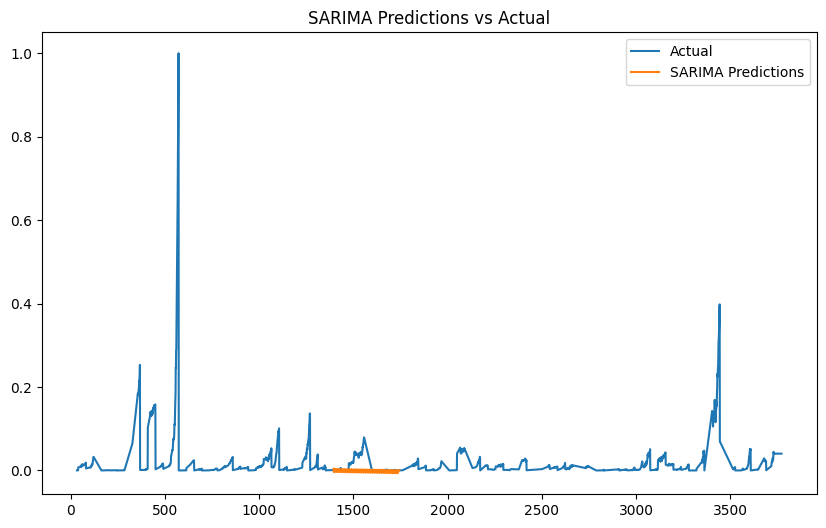

In [38]:
# Plot SARIMA predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated['renewables_energy(ej)'], label='Actual')
plt.plot(sarima_predictions, label='SARIMA Predictions')
plt.legend()
plt.title('SARIMA Predictions vs Actual')
plt.show()
